In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Dropout, Conv2DTranspose, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = ImageDataGenerator(rescale = 1/255)
val = ImageDataGenerator(rescale = 1/255)

train_dataset = train.flow_from_directory('FER2013/train',batch_size = 16,classes = ['angry','disgust','fear','happy','neutral','sad','surprise'])
val_dataset = val.flow_from_directory('FER2013/test',batch_size = 16,classes = ['angry','disgust','fear','happy','neutral','sad','surprise'],)

input_shape = (48,48,3)

image_input = Input(input_shape)

resnet = ResNet50(input_shape=(48,48,3), weights='imagenet', include_top=False)(image_input)

resnet.trainable = False

x = GlobalAveragePooling2D()(resnet)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
prediction = Dense(7, activation='softmax')(x)

model = Model(inputs=image_input, outputs=prediction)

model.compile(
   loss = 'categorical_crossentropy',
   optimizer = tf.keras.optimizers.Adam(),
   metrics = ['accuracy'],
)

#filepath="/Internship/Results/ResNet50/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, verbose=1,monitor='val_acc',save_best_only=True,mode='max')
early_stop = EarlyStopping(monitor='val_loss',patience=20,verbose=1)
#log_csv = CSVLogger('/Internship/Results/ResNet50/logs.csv',separator=',',append=False)

#callbacks_list = [checkpoint, early_stop, log_csv]

X = model.fit(
   train_dataset,
   validation_data = val_dataset,
   epochs = 100,
   verbose=1,
   callbacks = early_stop,
)
 
fer_json = model.to_json()
with open("ResNet50.json", "w") as json_file:
   json_file.write(fer_json)
model.save_weights("ResNet50.h5")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/100
1795/1795 [==============================] - 395s 220ms/step - loss: 1.6550 - accuracy: 0.3378 - val_loss: 9.7284 - val_accuracy: 0.1254
Epoch 2/100
1795/1795 [==============================] - 400s 223ms/step - loss: 1.4323 - accuracy: 0.4487 - val_loss: 1.4918 - val_accuracy: 0.4228
Epoch 3/100
1795/1795 [==============================] - 400s 223ms/step - loss: 1.3174 - accuracy: 0.4953 - val_loss: 1.2559 - val_accuracy: 0.5228
Epoch 4/100
1795/1795 [==============================] - 400s 223ms/step - loss: 1.2312 - accuracy: 0.5367 - val_loss: 1.2082 - val_accuracy: 0.5390
Epoch 5/100
1795/1795 [==============================] - 400s 223ms/step - loss: 1.1510 - accuracy: 0.5688 - val_loss: 1.2237 - val_accuracy: 0.5376
Epoch 6/100
1795/1795 [==============================] - 399s 223ms/step - loss: 1.0769 - accuracy: 0.6000 - val_loss: 1.2416 - val_accuracy: 0.5383
Epoch 7/100
1795/1795

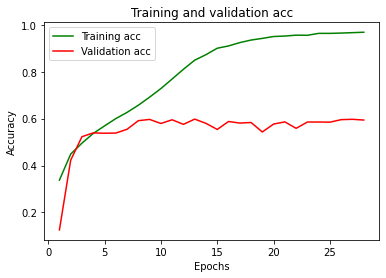

In [11]:
acc = X.history['accuracy']
val_acc = X.history['val_accuracy']
epochs = range(1,29)
plt.plot(epochs,acc,'g',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()